# Example of using the Borehole3D class

## Imports

In [1]:
from striplog import Component, Decor, Legend, Lexicon, Striplog
from core.omf import Borehole3D, striplog_legend_to_omf_legend 
from utils.lexicon.lexicon_memoris import lexicon_memoris, lithology_memoris, pollutant_memoris
from utils.io import boreholes_from_files, gdf_viewer
from core.core import Project
from core.orm import BoreholeOrm, PositionOrm, Base 
import random
from os import remove
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
from definitions import ROOT_DIR

/home/yanathan/.local/share/virtualenvs/GSDMA-DRfwm83x/lib/python3.8/site-packages/striplog/legend.py:687: UserWarning: This legend contains duplicate components.
  warnings.warn(w)
/home/yanathan/.local/share/virtualenvs/GSDMA-DRfwm83x/lib/python3.8/site-packages/striplog/legend.py:687: UserWarning: This legend contains duplicate components.
  warnings.warn(w)


## Reading of CSV files in a dir

In [2]:
#df = pd.read_csv('test_data_boreholes.csv', sep=',') # use english lexicon
df = pd.read_csv('test_litho_fr.csv', sep=',') # use french lexicon

## Data Checking

In [3]:
#pol = ['As', 'Ni', 'Cl', 'Hg', 'Pb', 'Zn']
pol = ['VR','VS','VI']
df[['Pollutant', 'Concentration']] = ''
df['Pollutant'] = df['Pollutant'].apply(lambda x: random.sample(pol, 1)[0])
df['Concentration'] = df['Concentration'].apply(lambda x: np.random.randint(0,100))
df['Unit'] = 'mg/l'

In [4]:
df['Lithology'] = df['Lithology'].replace({'Grès':'Marne', 'Calcaire':'Dolomie'})

In [5]:
df.loc[35.5, :] = ['BH007',152794.0, 121111.0, 60.0, 0.57, 45, 'Calcaire', 'Bleu', 4, 41, 45, 'Cl', 78, 'mg/l']
df.loc[25.5, :] = ['BH005',152473.0, 121460.0, 72.0, 0.61, 32, 'Graviers', 'gris', 3, 29, 32, 'Cl', 78, 'mg/l']
df.drop(index=4, inplace=True)
df = df.sort_index().reset_index(drop=True)

In [6]:
gdf_viewer(df)

Rows : 996, columns : 14


interactive(children=(IntSlider(value=10, description='rows', max=996, min=10, readout=False), IntSlider(value…

## Create Boreholes from dataframes or files

In [7]:
bhs_df=[df[0:50]] # list of dataframes

In [8]:
boreholes, components, link_intv_comp = boreholes_from_files(bhs_df, verbose=False,
                                                litho_field=['Lithology', 'Pollutant'], 
                                                color_field='Colour', lexicon=lexicon_memoris, 
                                                diam_field='Diameter', thick_field='Thickness')


Dataframe 0 processing...
|__ID:'BH001'
{'lithology': 'sable', 'pollutant': 'vr'}
{'lithology': 'argile', 'pollutant': 'vs'}
{'lithology': 'marne', 'pollutant': 'vi'}
{'lithology': 'charbon', 'pollutant': 'vs'}
Summary : [Striplog(4 Intervals, start=0.0, stop=28.0)]
|__ID:'BH002'
{'lithology': 'sable', 'pollutant': 'vs'}
{'lithology': 'argile', 'pollutant': 'vr'}
{'lithology': 'marne', 'pollutant': 'vr'}
{'lithology': 'charbon', 'pollutant': 'vi'}
{'lithology': 'dolomie', 'pollutant': 'vs'}
Summary : [Striplog(5 Intervals, start=0.0, stop=37.0)]
|__ID:'BH003'
{'lithology': 'sable', 'pollutant': 'vr'}
{'lithology': 'argile', 'pollutant': 'vr'}
{'lithology': 'marne', 'pollutant': 'vs'}
{'lithology': 'charbon', 'pollutant': 'vr'}
{'lithology': 'dolomie', 'pollutant': 'vr'}
Summary : [Striplog(5 Intervals, start=0.0, stop=18.0)]
|__ID:'BH004'
{'lithology': 'sable', 'pollutant': 'vs'}
{'lithology': 'argile', 'pollutant': 'vi'}
{'lithology': 'marne', 'pollutant': 'vs'}
{'lithology': 'charbo

/home/yanathan/Projects/GSDMA/utils/io.py:476: SAWarning: relationship 'ComponentOrm.intervals' will copy column Components.id to column Linkintervalcomponent.comp_id, which conflicts with relationship(s): 'IntervalOrm.components' (copies Components.id to Linkintervalcomponent.comp_id). If this is not the intention, consider if these relationships should be linked with back_populates, or if viewonly=True should be applied to one or more if they are read-only. For the less common case that foreign key constraints are partially overlapping, the orm.foreign() annotation can be used to isolate the columns that should be written towards.   The 'overlaps' parameter may be used to remove this warning.
  boreholes.append(BoreholeOrm(id=bh_name))
/home/yanathan/Projects/GSDMA/utils/io.py:476: SAWarning: relationship 'ComponentOrm.intervals' will copy column Intervals.id to column Linkintervalcomponent.int_id, which conflicts with relationship(s): 'IntervalOrm.components' (copies Intervals.id to

In [9]:
boreholes

[<core.orm.BoreholeOrm>(Name=BH001, Length=28.0, Diameter=0.43, Intervals=4),
 <core.orm.BoreholeOrm>(Name=BH002, Length=37.0, Diameter=0.6, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH003, Length=18.0, Diameter=0.41, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH004, Length=26.0, Diameter=0.61, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH005, Length=32.0, Diameter=0.61, Intervals=6),
 <core.orm.BoreholeOrm>(Name=BH006, Length=26.0, Diameter=0.31, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH007, Length=45.0, Diameter=0.57, Intervals=6),
 <core.orm.BoreholeOrm>(Name=BH008, Length=35.0, Diameter=0.39, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH009, Length=40.0, Diameter=0.5, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH10, Length=14.0, Diameter=0.31, Intervals=4)]

In [10]:
components

{0: Component({'lithology': 'marne', 'pollutant': 'vi'}),
 1: Component({'lithology': 'charbon', 'pollutant': 'vs'}),
 2: Component({'lithology': 'argile', 'pollutant': 'vs'}),
 3: Component({'lithology': 'sable', 'pollutant': 'vr'}),
 4: Component({'lithology': 'dolomie', 'pollutant': 'vs'}),
 5: Component({'lithology': 'marne', 'pollutant': 'vr'}),
 6: Component({'lithology': 'sable', 'pollutant': 'vs'}),
 7: Component({'lithology': 'argile', 'pollutant': 'vr'}),
 8: Component({'lithology': 'charbon', 'pollutant': 'vi'}),
 9: Component({'lithology': 'dolomie', 'pollutant': 'vr'}),
 10: Component({'lithology': 'charbon', 'pollutant': 'vr'}),
 11: Component({'lithology': 'marne', 'pollutant': 'vs'}),
 12: Component({'lithology': 'dolomie', 'pollutant': 'vi'}),
 13: Component({'lithology': 'argile', 'pollutant': 'vi'}),
 14: Component({'lithology': 'graviers'}),
 15: Component({'lithology': 'calcaire'}),
 16: Component({'lithology': 'sable', 'pollutant': 'vi'})}

In [11]:
len(boreholes), len(components)

(10, 17)

## Create a project and save data in a database

In [12]:
remove('tmp_files/tfe_orm_db.db')

In [13]:
engine = create_engine('sqlite:///tmp_files/tfe_orm_db.db', echo=True)

In [14]:
Base.metadata.create_all(engine)

2021-06-27 04:31:53,190 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-27 04:31:53,191 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Boreholes")
2021-06-27 04:31:53,192 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-06-27 04:31:53,194 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("Boreholes")
2021-06-27 04:31:53,196 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-06-27 04:31:53,197 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Positions")
2021-06-27 04:31:53,198 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-06-27 04:31:53,199 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("Positions")
2021-06-27 04:31:53,199 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-06-27 04:31:53,201 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Intervals")
2021-06-27 04:31:53,201 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-06-27 04:31:53,202 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("Intervals")
2021-06-27 04:31:53,203 INFO sqlalchemy.engine.Engine 

In [15]:
Session = sessionmaker(bind=engine)
session = Session()

In [16]:
p = Project(session, legend_dict={'lithology':lithology_memoris, 'pollutant':pollutant_memoris}, 
            lexicon=lexicon_memoris, repr_attribute='lithology')

p.add_components(components)

2021-06-27 04:31:53,250 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-27 04:31:53,252 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-27 04:31:53,252 INFO sqlalchemy.engine.Engine [generated in 0.00060s] ()
2021-06-27 04:31:53,257 INFO sqlalchemy.engine.Engine INSERT INTO "Components" (id, description) VALUES (?, ?)
2021-06-27 04:31:53,258 INFO sqlalchemy.engine.Engine [generated in 0.00122s] ((0, 'Marne, vi'), (1, 'Charbon, vs'), (2, 'Argile, vs'), (3, 'Sable, vr'), (4, 'Dolomie, vs'), (5, 'Marne, vr'), (6, 'Sable, vs'), (7, 'Argile, vr')  ... displaying 10 of 17 total bound parameter sets ...  (15, 'Calcaire'), (16, 'Sable, vi'))
2021-06-27 04:31:53,260 INFO sqlalchemy.engine.Engine COMMIT
2021-06-27 04:31:53,263 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-27 04:31:53,264 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Bor

Add boreholes into the project

In [17]:
for bh in boreholes:
    p.add_borehole(bh)

2021-06-27 04:31:53,274 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-27 04:31:53,275 INFO sqlalchemy.engine.Engine [generated in 0.00143s] ('BH001', 28.0, 0.43)
2021-06-27 04:31:53,278 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-27 04:31:53,279 INFO sqlalchemy.engine.Engine [generated in 0.00105s] ((0, 0.0, 0.0, 0.0, 152600.0, 121039.0), (1, 4.0, 4.0, 4.0, 152600.0, 121039.0), (2, 4.0, 4.0, 4.0, 152600.0, 121039.0), (3, 8.0, 8.0, 8.0, 152600.0, 121039.0), (4, 8.0, 8.0, 8.0, 152600.0, 121039.0), (5, 20.0, 20.0, 20.0, 152600.0, 121039.0), (6, 20.0, 20.0, 20.0, 152600.0, 121039.0), (7, 28.0, 28.0, 28.0, 152600.0, 121039.0))
2021-06-27 04:31:53,281 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-27 04:31:53,282 INFO sqlalchemy.engine.Engine [generated in 0.0

2021-06-27 04:31:53,369 INFO sqlalchemy.engine.Engine [cached since 0.06202s ago] (9,)
2021-06-27 04:31:53,371 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-27 04:31:53,372 INFO sqlalchemy.engine.Engine [cached since 0.07025s ago] (10,)
2021-06-27 04:31:53,374 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-27 04:31:53,375 INFO sqlalchemy.engine.Engine [cached since 0.06782s ago] (11,)
2021-06-27 04:31:53,377 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions

2021-06-27 04:31:53,442 INFO sqlalchemy.engine.Engine [cached since 0.1409s ago] (24,)
2021-06-27 04:31:53,444 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-27 04:31:53,445 INFO sqlalchemy.engine.Engine [cached since 0.1382s ago] (25,)
2021-06-27 04:31:53,448 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-27 04:31:53,448 INFO sqlalchemy.engine.Engine [cached since 0.147s ago] (26,)
2021-06-27 04:31:53,451 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id

2021-06-27 04:31:53,528 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-27 04:31:53,529 INFO sqlalchemy.engine.Engine [cached since 0.2471s ago] ((19, 'BH005', 0, 'Sable VR', 38, 39), (20, 'BH005', 1, 'Argile VI', 40, 41), (21, 'BH005', 2, 'Marne VS', 42, 43), (22, 'BH005', 3, 'Charbon VI', 44, 45), (23, 'BH005', 4, 'Dolomie VS', 46, 47), (24, 'BH005', 5, 'Graviers Cl', 48, 49))
2021-06-27 04:31:53,530 INFO sqlalchemy.engine.Engine COMMIT
2021-06-27 04:31:53,535 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-27 04:31:53,536 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-27 04:31:53,536 INFO sqlalchemy.engine.Engine [cached since 0.2846s ago] ()
2021-06-27 04:31:53,539 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Inte

2021-06-27 04:31:53,610 INFO sqlalchemy.engine.Engine [cached since 0.3153s ago] ('BH006',)
2021-06-27 04:31:53,612 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-27 04:31:53,613 INFO sqlalchemy.engine.Engine [cached since 0.3113s ago] (50,)
2021-06-27 04:31:53,615 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-27 04:31:53,616 INFO sqlalchemy.engine.Engine [cached since 0.3089s ago] (51,)
2021-06-27 04:31:53,618 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positi

2021-06-27 04:31:53,680 INFO sqlalchemy.engine.Engine [cached since 0.378s ago] (64,)
2021-06-27 04:31:53,681 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-27 04:31:53,682 INFO sqlalchemy.engine.Engine [cached since 0.3754s ago] (65,)
2021-06-27 04:31:53,684 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-27 04:31:53,685 INFO sqlalchemy.engine.Engine [cached since 0.384s ago] (66,)
2021-06-27 04:31:53,688 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id"

2021-06-27 04:31:53,756 INFO sqlalchemy.engine.Engine [cached since 0.4493s ago] (79,)
2021-06-27 04:31:53,758 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-27 04:31:53,759 INFO sqlalchemy.engine.Engine [cached since 0.457s ago] (80,)
2021-06-27 04:31:53,760 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-27 04:31:53,761 INFO sqlalchemy.engine.Engine [cached since 0.4541s ago] (81,)
2021-06-27 04:31:53,773 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, d

2021-06-27 04:31:53,832 INFO sqlalchemy.engine.Engine COMMIT
2021-06-27 04:31:53,838 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-27 04:31:53,839 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-27 04:31:53,840 INFO sqlalchemy.engine.Engine [cached since 0.5878s ago] ()
2021-06-27 04:31:53,842 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-27 04:31:53,843 INFO sqlalchemy.engine.Engine [cached since 0.5482s ago] ('BH10',)
2021-06-27 04:31:53,845 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions

In [18]:
p.add_link_between_components_and_intervals(link_intv_comp)

2021-06-27 04:31:53,886 INFO sqlalchemy.engine.Engine INSERT INTO "Linkintervalcomponent" (int_id, comp_id, extra_data) VALUES (?, ?, ?)
2021-06-27 04:31:53,887 INFO sqlalchemy.engine.Engine [generated in 0.00151s] ((0, 3, ''), (1, 2, ''), (2, 0, ''), (3, 1, ''), (4, 6, ''), (5, 7, ''), (6, 5, ''), (7, 8, '')  ... displaying 10 of 50 total bound parameter sets ...  (48, 0, ''), (49, 1, ''))
2021-06-27 04:31:53,891 INFO sqlalchemy.engine.Engine COMMIT
2021-06-27 04:31:53,895 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-27 04:31:53,896 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-27 04:31:53,897 INFO sqlalchemy.engine.Engine [cached since 0.6453s ago] ()


In [19]:
p.commit()
print('Boreholes in the project : ', len(p.boreholes))

2021-06-27 04:31:53,902 INFO sqlalchemy.engine.Engine COMMIT
Boreholes in the project :  10


In [20]:
p.boreholes

2021-06-27 04:31:53,910 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-27 04:31:53,912 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-06-27 04:31:53,913 INFO sqlalchemy.engine.Engine [generated in 0.00084s] ('BH001',)
2021-06-27 04:31:53,915 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-27 04:31:53,916 INFO sqlalchemy.engine.Engine [cached since 0.6211s ago] ('BH001',)
2021-06-27 04:31:53,918 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length

[<core.orm.BoreholeOrm>(Name=BH001, Length=28.0, Diameter=0.43, Intervals=4),
 <core.orm.BoreholeOrm>(Name=BH002, Length=37.0, Diameter=0.6, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH003, Length=18.0, Diameter=0.41, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH004, Length=26.0, Diameter=0.61, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH005, Length=32.0, Diameter=0.61, Intervals=6),
 <core.orm.BoreholeOrm>(Name=BH006, Length=26.0, Diameter=0.31, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH007, Length=45.0, Diameter=0.57, Intervals=6),
 <core.orm.BoreholeOrm>(Name=BH008, Length=35.0, Diameter=0.39, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH009, Length=40.0, Diameter=0.5, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH10, Length=14.0, Diameter=0.31, Intervals=4)]

In [21]:
p.refresh(verbose=False)

2021-06-27 04:31:53,972 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-27 04:31:53,973 INFO sqlalchemy.engine.Engine [cached since 0.7209s ago] ()


In [22]:
session.close()

2021-06-27 04:31:53,980 INFO sqlalchemy.engine.Engine ROLLBACK


# 2D/3D Display

## Display one object

In [23]:
p.update_legend_cmap(update_legend=True)

leg: Decor({'_colour': '#ffcb23', 'width': 3, 'hatch': "'..'", 'component': Component({'lithology': 'sable'})})
Decor({'_colour': '#d5e6cc', 'width': 3, 'hatch': "'---'", 'component': Component({'lithology': 'argile'})})
Decor({'_colour': '#7ba1a8', 'width': 3, 'hatch': None, 'component': Component({'lithology': 'marne'})})
Decor({'_colour': '#000000', 'width': 3, 'hatch': None, 'component': Component({'lithology': 'charbon'})})
Decor({'_colour': '#fdaaff', 'width': 3, 'hatch': None, 'component': Component({'lithology': 'dolomie'})})
Decor({'_colour': '#adb7cc', 'width': 3, 'hatch': "'oo", 'component': Component({'lithology': 'graviers'})})
Decor({'_colour': '#149eff', 'width': 3, 'hatch': "'='", 'component': Component({'lithology': 'calcaire'})})


In [24]:
bh = 0
print(p.boreholes_3d[bh].name, '\n', p.boreholes_3d[bh].intervals)

BH001 
 [Interval({'top': Position({'middle': 0.0, 'upper': 0.0, 'lower': 0.0, 'x': 152600.0, 'y': 121039.0, 'units': 'm'}), 'base': Position({'middle': 4.0, 'x': 152600.0, 'y': 121039.0, 'units': 'm'}), 'description': 'Sable VR', 'data': {}, 'components': [Component({'lithology': 'sable', 'pollutant': 'vr'})]}), Interval({'top': Position({'middle': 4.0, 'x': 152600.0, 'y': 121039.0, 'units': 'm'}), 'base': Position({'middle': 8.0, 'x': 152600.0, 'y': 121039.0, 'units': 'm'}), 'description': 'Argile VS', 'data': {}, 'components': [Component({'lithology': 'argile', 'pollutant': 'vs'})]}), Interval({'top': Position({'middle': 8.0, 'x': 152600.0, 'y': 121039.0, 'units': 'm'}), 'base': Position({'middle': 20.0, 'x': 152600.0, 'y': 121039.0, 'units': 'm'}), 'description': 'Marne VI', 'data': {}, 'components': [Component({'lithology': 'marne', 'pollutant': 'vi'})]}), Interval({'top': Position({'middle': 20.0, 'x': 152600.0, 'y': 121039.0, 'units': 'm'}), 'base': Position({'middle': 28.0, 'x'

/home/yanathan/.local/share/virtualenvs/GSDMA-DRfwm83x/lib/python3.8/site-packages/striplog/striplog.py:1505: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "'". Passing invalid values is deprecated since 3.4 and will become an error two minor releases later.
  rect = mpl.patches.Rectangle(origin,
/home/yanathan/.local/share/virtualenvs/GSDMA-DRfwm83x/lib/python3.8/site-packages/striplog/legend.py:311: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "'". Passing invalid values is deprecated since 3.4 and will become an error two minor releases later.
  rect1 = patches.Rectangle((0, 0),


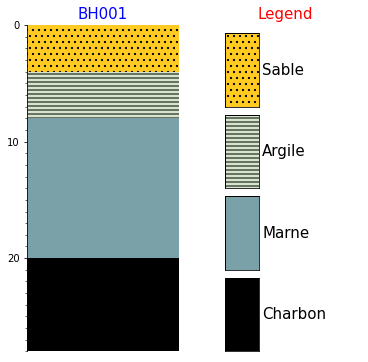

In [25]:
p.boreholes_3d[bh].plot2d()

In [26]:
p.boreholes_3d[bh].plot3d()

Colormap computing ...


ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [27]:
p.legend_dict['pollutant']

Legend(Decor({'_colour': '#00ff00', 'width': None, 'component': Component({'pollutant': 'vr'}), 'hatch': None})
Decor({'_colour': '#ffa500', 'width': None, 'component': Component({'pollutant': 'vs'}), 'hatch': None})
Decor({'_colour': '#ff0000', 'width': None, 'component': Component({'pollutant': 'vi'}), 'hatch': None})
Decor({'_colour': '#ffffff', 'width': None, 'component': Component({'pollutant': 'inconnu'}), 'hatch': None}))

leg: 


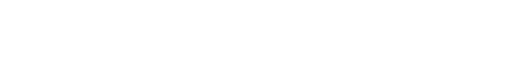

In [28]:
p.update_legend_cmap(repr_attribute='pollutant')[1] #legend=lithology_memoris, update_legend=False)[0]

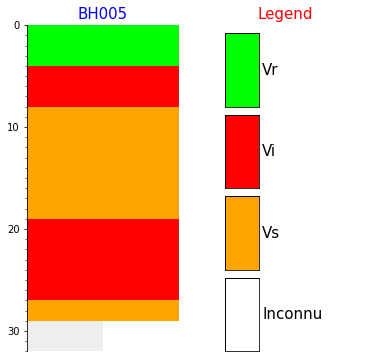

In [29]:
p.boreholes_3d[4].plot2d(repr_attribute='pollutant', repr_legend=pollutant_memoris)

/home/yanathan/.local/share/virtualenvs/GSDMA-DRfwm83x/lib/python3.8/site-packages/striplog/striplog.py:1505: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "'". Passing invalid values is deprecated since 3.4 and will become an error two minor releases later.
  rect = mpl.patches.Rectangle(origin,
/home/yanathan/.local/share/virtualenvs/GSDMA-DRfwm83x/lib/python3.8/site-packages/striplog/legend.py:311: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "'". Passing invalid values is deprecated since 3.4 and will become an error two minor releases later.
  rect1 = patches.Rectangle((0, 0),


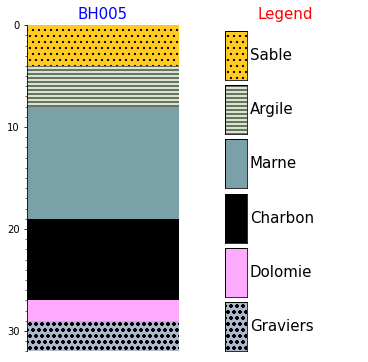

In [30]:
p.boreholes_3d[4].plot2d(repr_attribute='lithology')#, repr_legend=pollutant_memoris)

In [31]:
p.boreholes_3d[4].components

[Component({'lithology': 'marne', 'pollutant': 'vs'}),
 Component({'lithology': 'charbon', 'pollutant': 'vi'}),
 Component({'lithology': 'argile', 'pollutant': 'vi'}),
 Component({'lithology': 'sable', 'pollutant': 'vr'}),
 Component({'lithology': 'graviers'}),
 Component({'lithology': 'dolomie', 'pollutant': 'vs'})]

In [32]:
test = ['A', 'B', 'C', None, 'A']
test.index('A'), None in test 
#test[test.index('A')] += 'X'
list(pd.unique(test))

['A', 'B', 'C', None]

### Display project boreholes

In [33]:
p.plot3d(repr_attribute='lithology', labels_size=15, bg_color=["royalblue", "aliceblue"], window_size=(1300, 1000))

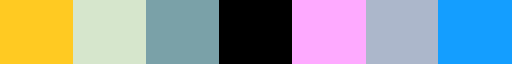

In [34]:
p.cmap

### Boreholes in 3D using X3D for interaction within the notebook